# Multiple powerline loops

Figure 10 of the Kang et al. (2020) is generated using this notebook. 
To run the simulation, you need to run `n_powerline_loops.py` in the folder. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os
os.chdir("./n_powerline_loops/")
datas = []
sort_inds = np.argsort(np.array([tmp.split('.')[0].strip('data') for tmp in glob.glob("data*")], dtype=float))
for file in np.array(glob.glob("data*"))[sort_inds]:
    datas.append(np.load(file))
x = np.load("xyz.npy")

In [2]:
pico = 1e-12
area = 536.36
moment = pico * area

In [3]:
n_towers = [2, 4, 6, 8, 10, 12, 14, 16, 18]

In [4]:
import matplotlib
matplotlib.rcParams['font.size'] = 14

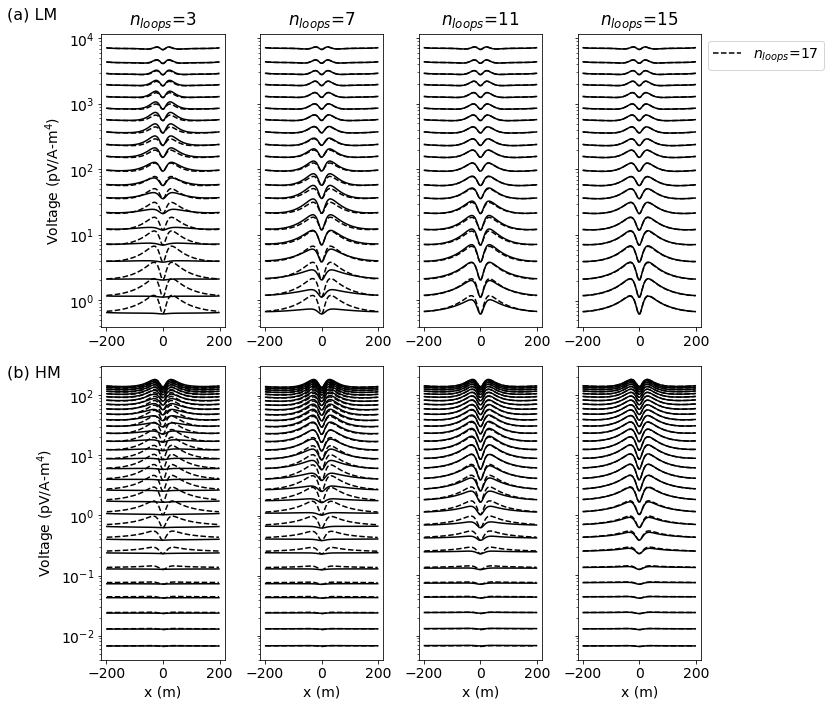

In [5]:
cs_labels = ['$n_{loops}$='+str(n_tower-1) for n_tower in n_towers]
# ['1 m', '0.5 m', '0.25 m', '10.25 cm', '6.25 cm', '3.12 5cm']
fig, axs = plt.subplots(2,4, figsize=(12, 10))
data_hm_fine = datas[-1][:100*30].reshape((30, 100), order='F').T
data_lm_fine = datas[-1][100*30:].reshape((20, 100), order='F').T  

for jj, ii in enumerate(range(1, len(n_towers)-1, 2)):
    data = datas[ii]
    data_hm = data[:100*30].reshape((30, 100), order='F').T
    data_lm = data[100*30:].reshape((20, 100), order='F').T  
    out = axs[0,jj].semilogy(x[:,0], -data_lm_fine/moment, 'k--', ms=3)
    if jj==3:
        axs[0, jj].legend(('$n_{loops}$=17', ), bbox_to_anchor=(1,1))        
    out = axs[0,jj].semilogy(x[:,0], -data_lm/moment, 'k-', ms=3)            
    out = axs[1,jj].semilogy(x[:,0], -data_hm/moment, 'k-', ms=3)    
    out = axs[1,jj].semilogy(x[:,0], -data_hm_fine/moment, 'k--', ms=3)    
    if jj > 0:
        axs[0,jj].set_yticklabels([])
        axs[1,jj].set_yticklabels([])        
    else:
        axs[0,jj].text(-550, 2e4, "(a) LM", fontsize=16)
        axs[1,jj].text(-550, 2e2, "(b) HM", fontsize=16)        
    axs[0,jj].set_title(cs_labels[ii])
    axs[1,jj].set_xlabel("x (m)")

axs[0, 0].set_ylabel("Voltage (pV/A-m$^4$)")
axs[1, 0].set_ylabel("Voltage (pV/A-m$^4$)")

plt.tight_layout()
fig.savefig('../figures/figure-10', dpi=200)